In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 


from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,  mean_squared_error, mean_absolute_error
print("All dependencies are imported.")

All dependencies are imported.


In [17]:
data = pd.read_csv('insurance.csv')
df = pd.DataFrame(data)

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

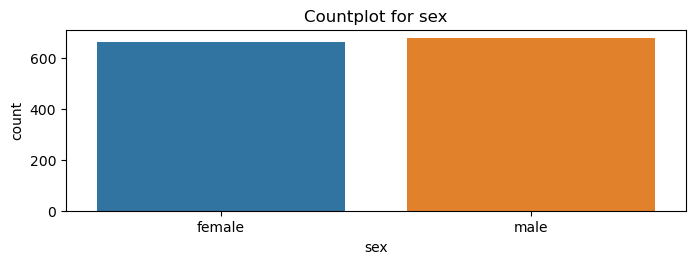

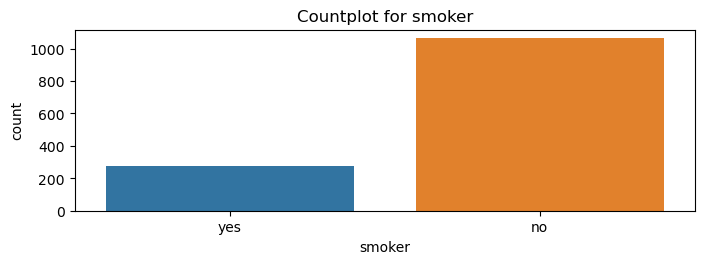

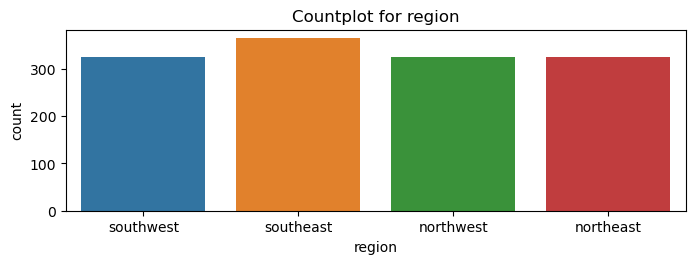

In [21]:
def plot_object_columns(df):
    column_names = df.columns.to_list()

    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    for i, column_name in enumerate(object_list, 1):
        plt.figure(figsize=(8, 8))
        plt.subplot(len(object_list), 1, i)
        sns.countplot(x=df[column_name], data=df)
        plt.title(f'Countplot for {column_name}')
        plt.show()

plot_object_columns(df)

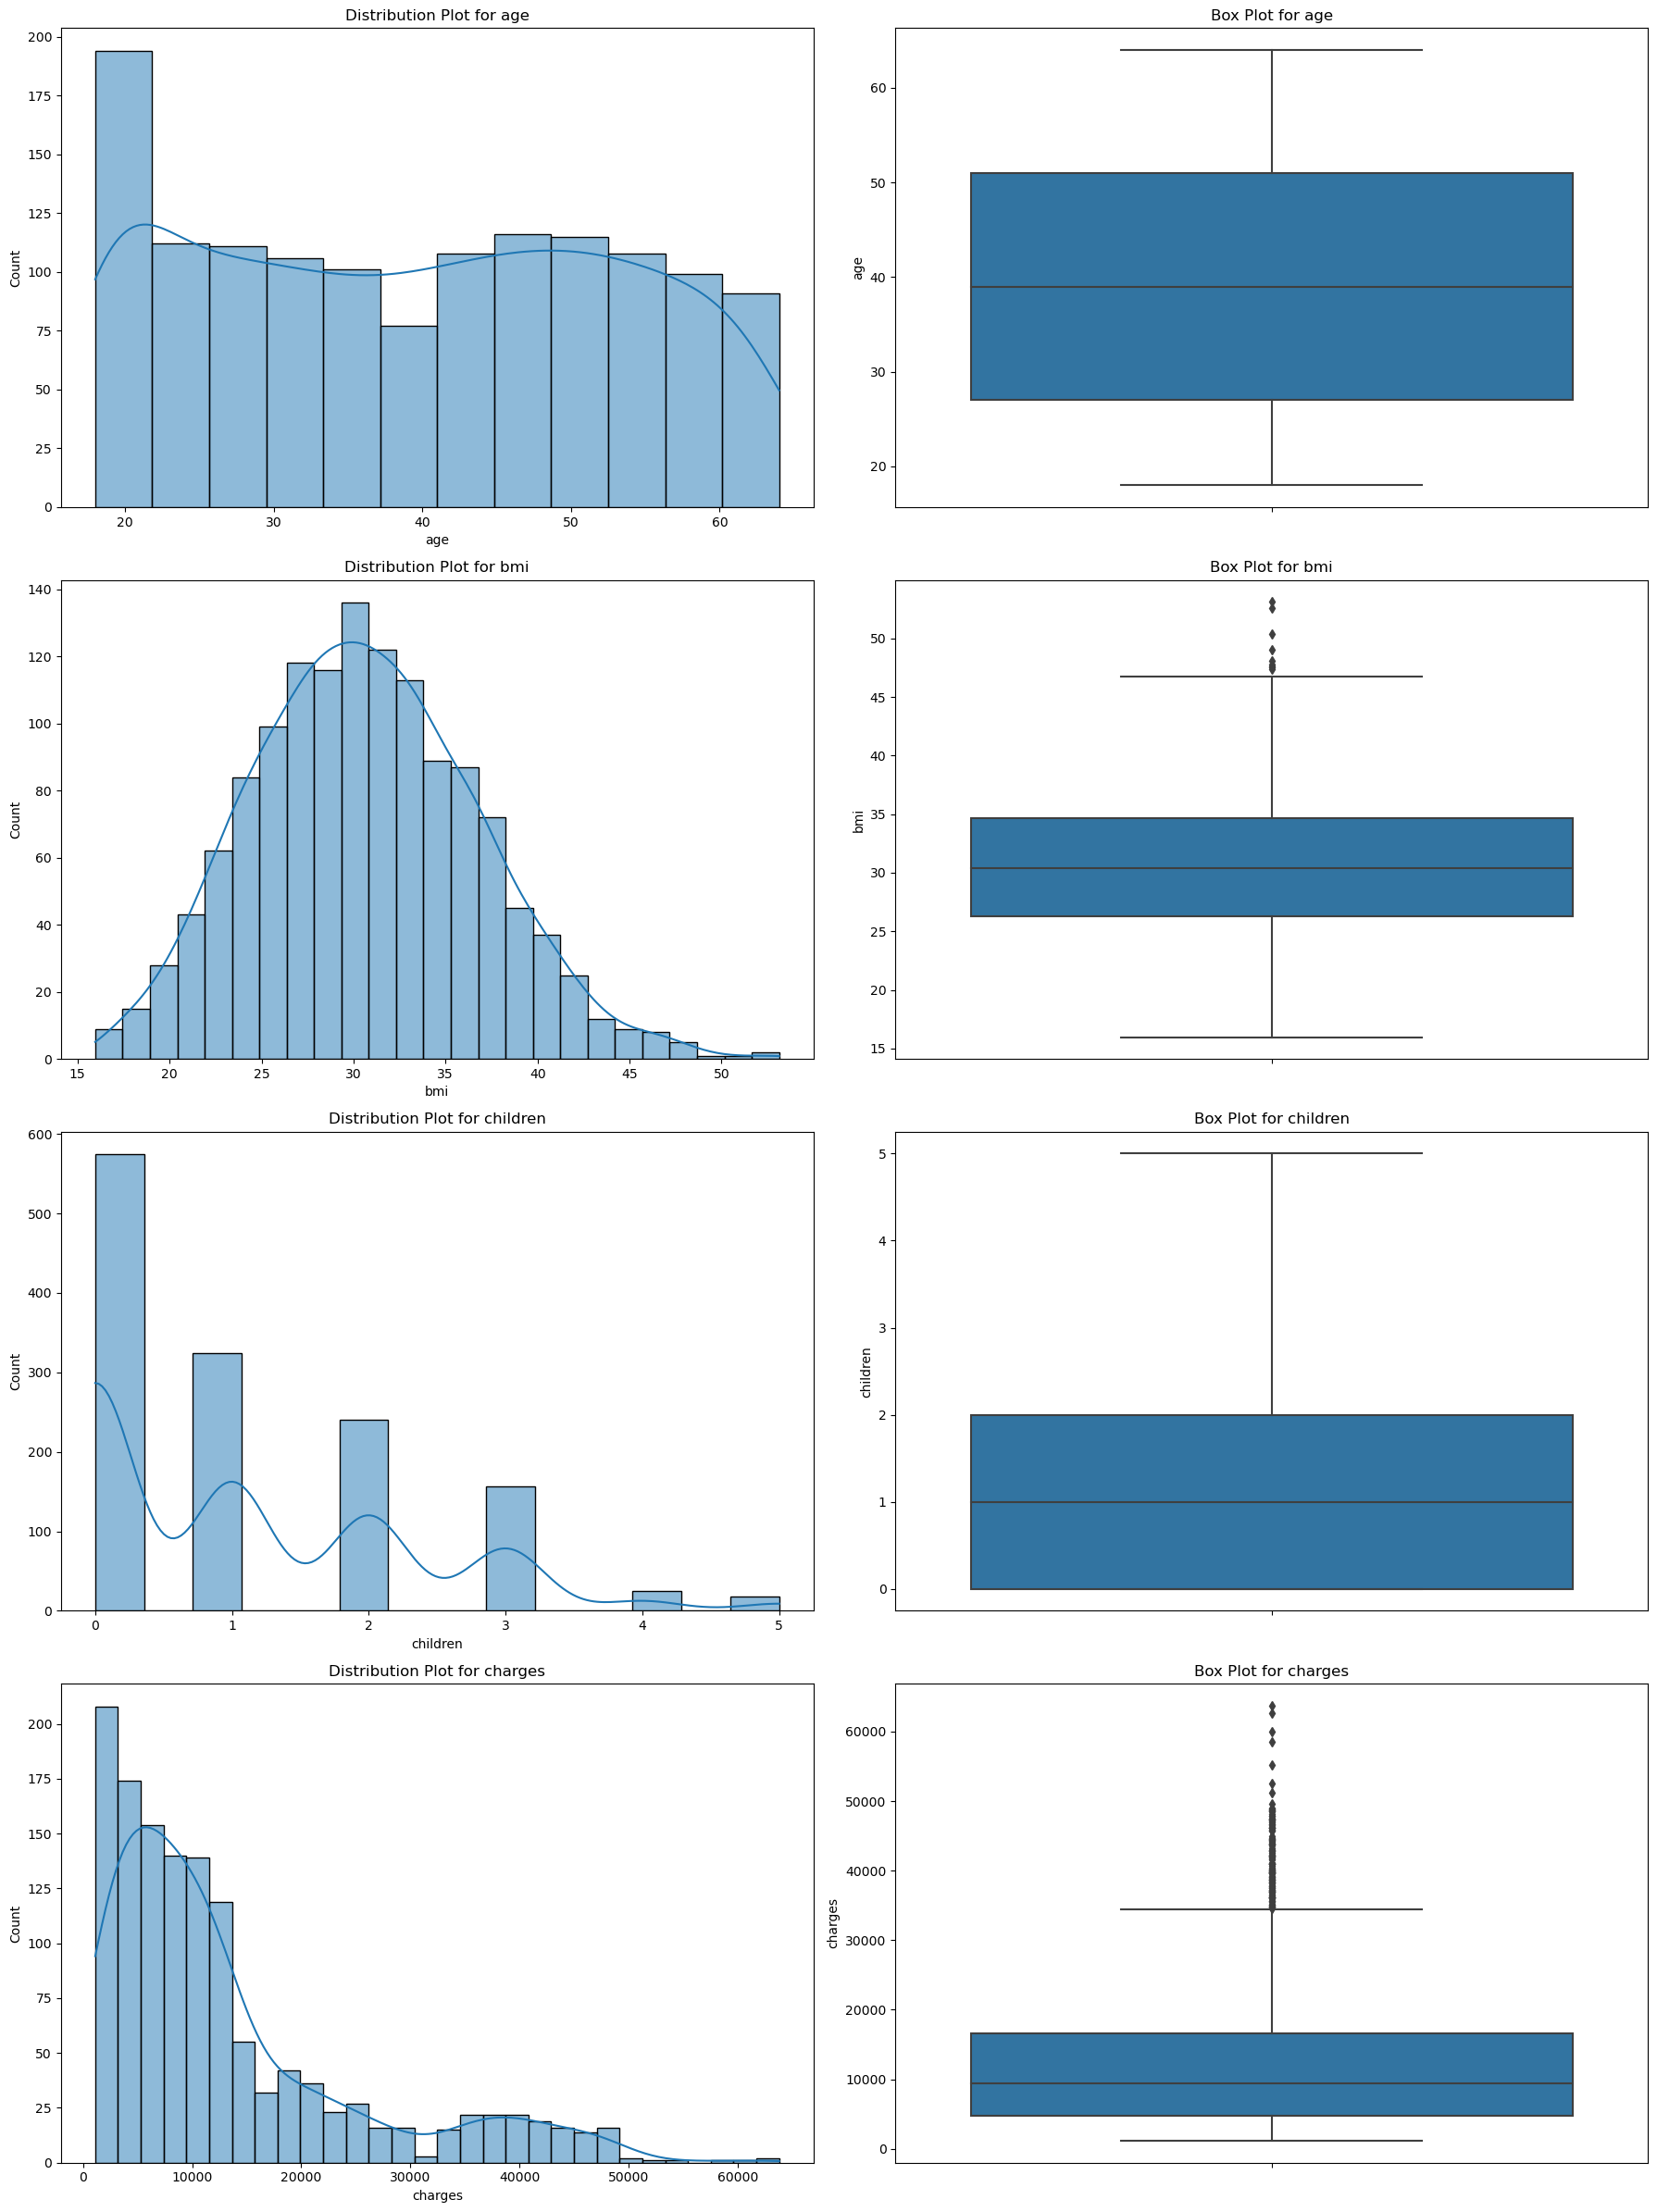

In [22]:
def plot_numerical_columns(df):
    column_names = df.columns.to_list()
    
    numerical_list = [column_name for column_name in column_names if df[column_name].dtype in ['int64', 'float64']]
    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    fig, axes = plt.subplots(nrows=len(numerical_list), ncols=2, figsize=(18, 6 * len(numerical_list)))

    for i, column_name in enumerate(numerical_list):
        sns.histplot(df[column_name], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution Plot for {column_name}')

        sns.boxplot(y=df[column_name], ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot for {column_name}')

    plt.tight_layout()

    plt.show()
    
    return numerical_list, object_list

numerical_list,object_list = plot_numerical_columns(df)

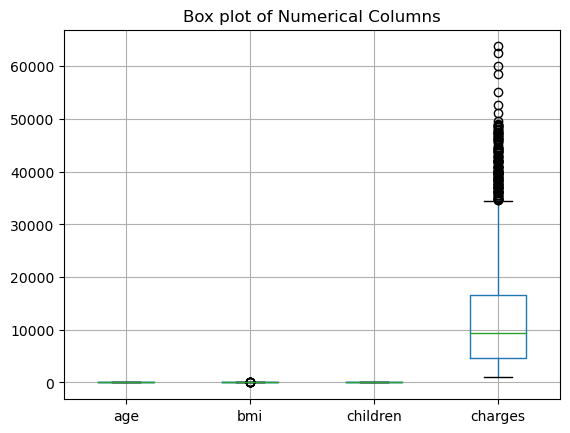

In [23]:
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [24]:
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

In [25]:
df_cleaned.shape, df.shape

((1069, 7), (1338, 7))

In [ ]:
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

plt.bar(charges_by_region.index, charges_by_region.values, color='green')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')
plt.xticks(rotation=45)
plt.show()

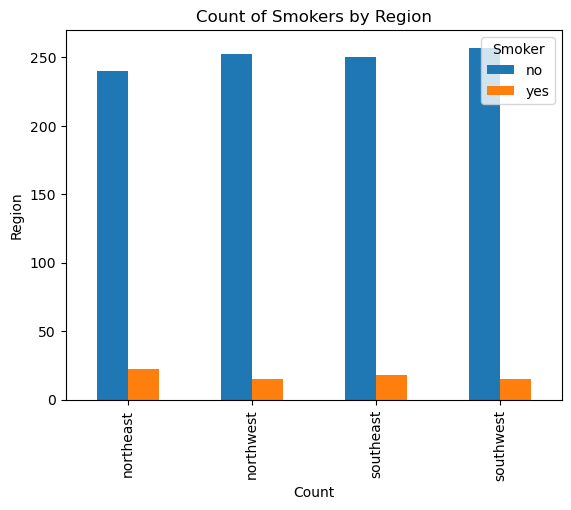

In [26]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

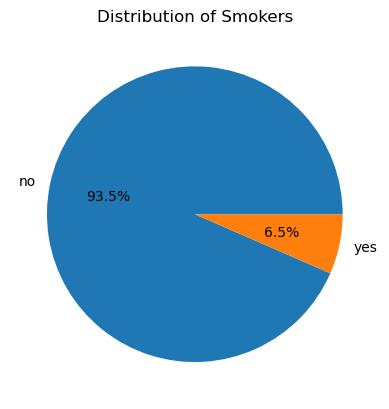

In [14]:
smoker_counts = df_cleaned['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

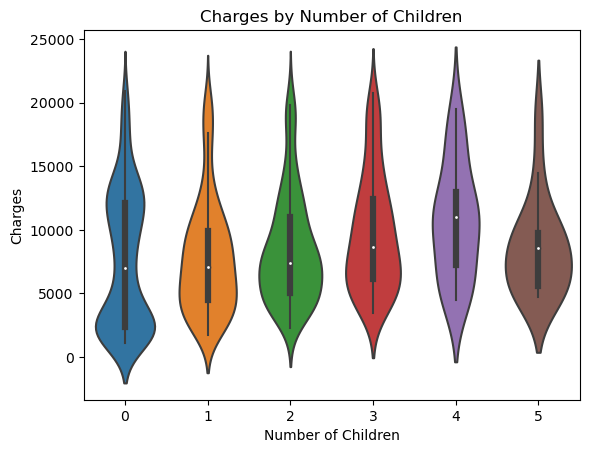

In [15]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

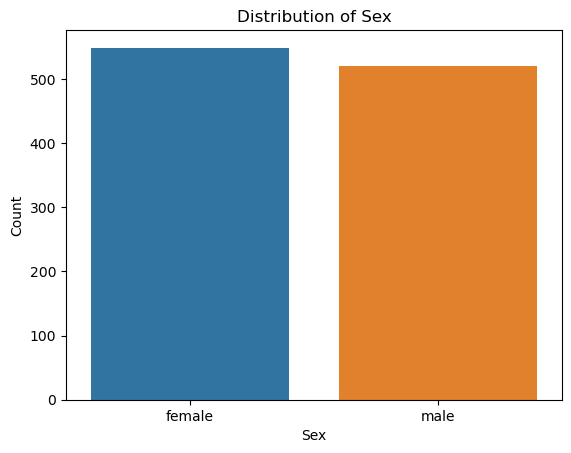

In [16]:
sns.countplot(x='sex', data=df_cleaned)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

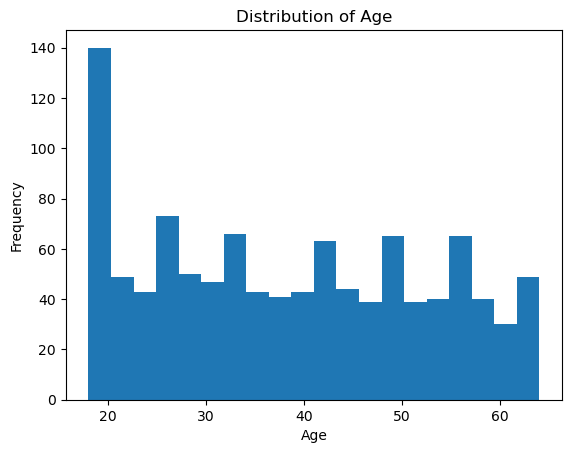

In [17]:
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

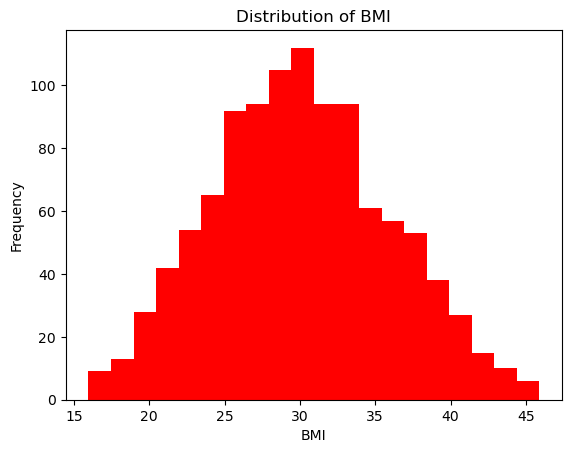

In [18]:
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')

plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

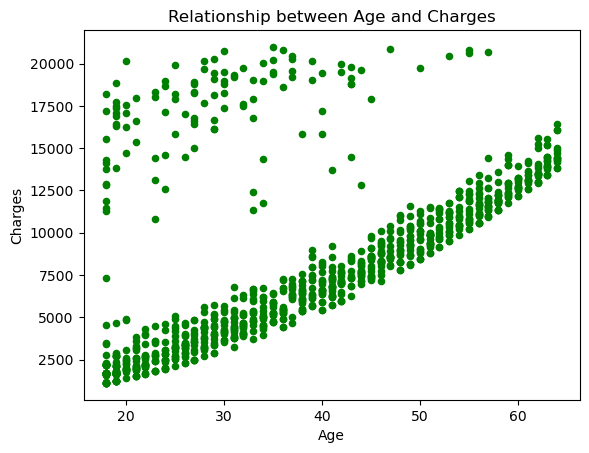

In [19]:
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

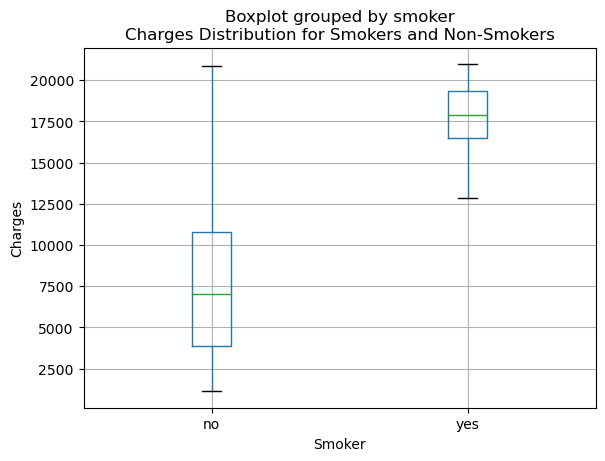

In [20]:
df_cleaned.boxplot(column='charges', by='smoker')

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

In [21]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_group
1244,18,male,33.330,0,no,southeast,1135.94070,Young
182,22,male,19.950,3,no,northeast,4005.42250,Young
1108,26,male,30.000,1,no,southwest,2904.08800,Adult
492,18,female,25.080,0,no,northeast,2196.47320,Young
31,18,female,26.315,0,no,northeast,2198.18985,Young


In [22]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
386,58,female,39.05,0,no,11856.4115,Middle-aged,0,0,1,0
72,53,female,28.10,3,no,11741.7260,Middle-aged,0,0,0,1
482,18,female,31.35,0,no,1622.1885,Young,0,0,1,0
121,18,male,23.75,0,no,1705.6245,Young,1,0,0,0
1126,55,male,29.90,0,no,10214.6360,Middle-aged,0,0,0,1


In [23]:
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
994,27,female,20.045,3,yes,16420.49455,Adult,0,1,0,0,1
798,58,female,33.100,0,no,11848.14100,Middle-aged,0,0,0,1,0
207,35,male,27.740,2,yes,20984.09360,Adult,1,0,0,0,1
809,25,male,25.840,1,no,3309.79260,Young,1,0,0,0,0
908,63,male,39.800,3,no,15170.06900,Senior,0,0,0,1,0


In [24]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
1286,28,17.290,0,3732.62510,Adult,1,0,0,0,0
1203,51,32.300,1,9964.06000,Middle-aged,1,0,0,0,0
31,18,26.315,0,2198.18985,Young,1,0,0,0,0
418,64,39.160,1,14418.28040,Senior,0,0,1,0,0
4,32,28.880,0,3866.85520,Adult,0,1,0,0,0


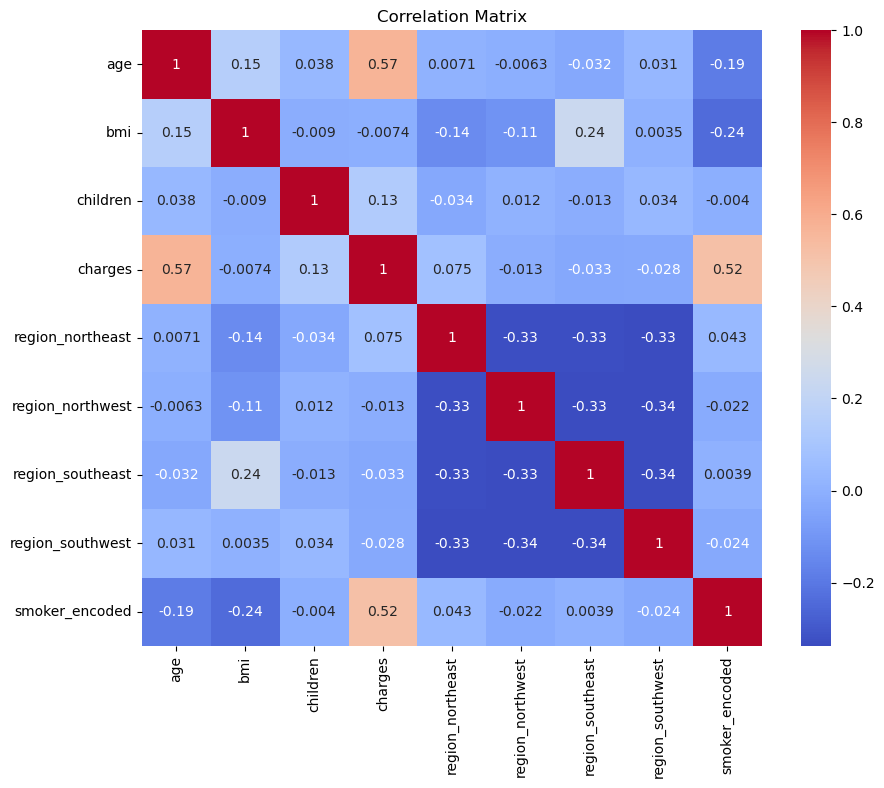

Relevant features based on correlation:
['age', 'smoker_encoded']


In [25]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

In [26]:
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

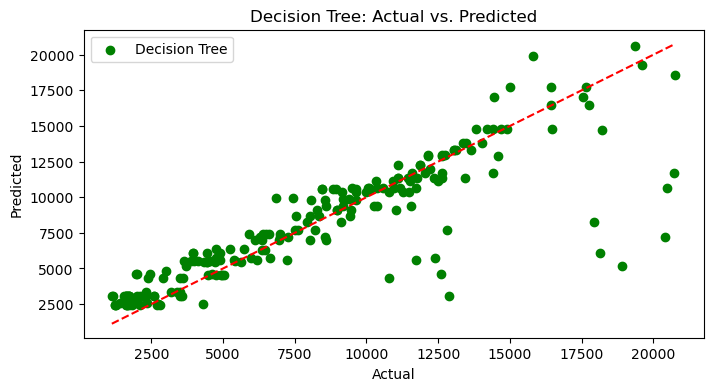

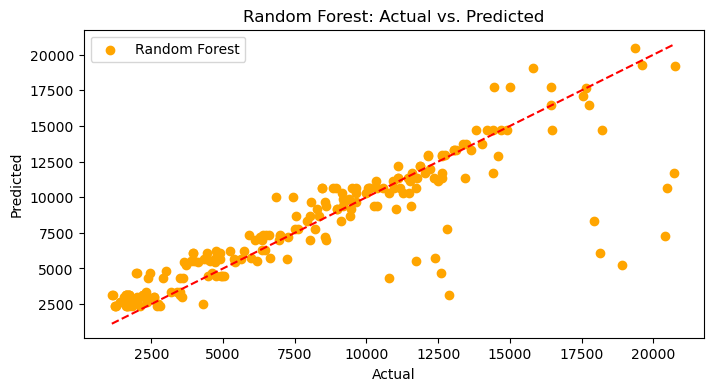

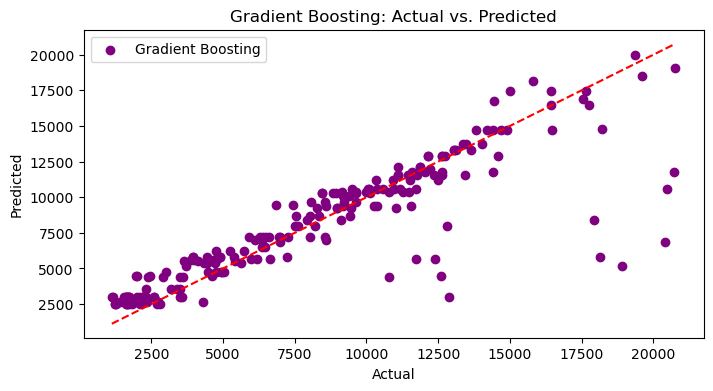

In [27]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [28]:
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Decision Tree - MSE:  6378425.50391518
Decision Tree - MAE:  1383.8273704916207
Random Forest - MSE:  6342530.9427960375
Random Forest - MAE:  1377.8286809304725
Gradient Boosting - MSE:  6269451.031971683
Gradient Boosting - MAE:  1339.3221540053605


In [29]:
print("Decision Tree:")

importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print()

print("Random Forest:")

importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")

print()

print("Gradient Boosting:")

importance = gb_model.feature_importances_ 
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.6249480642965459
smoker_encoded: 0.37505193570345413

Random Forest:
age: 0.613484894161907
smoker_encoded: 0.38651510583809295

Gradient Boosting:
age: 0.614718281304042
smoker_encoded: 0.3852817186959579


In [30]:
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})

dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Decision Tree Predictions: [18930.96297]
Random Forest Predictions: [18902.10451386]
Gradient Boosting Predictions: [18776.28430042]


In [31]:
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [0]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [6246.21128875]


In [32]:
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [1]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19970.33044812]


In [33]:
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [0]}) 
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [14727.75642643]


In [34]:
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [1]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19116.10090106]
